In [46]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np

In [2]:
def read_file(file):
    """
    Read a file to a dict of lists.

    :param str file: Path to a sample file.
    :return: dict of lists of records
    :rtype: dict
    """
    vcf_dict = []
    #df = pd.DataFrame()
    with open(file, 'r') as invcf:
        for line in invcf:
            if line.startswith('track'):
                continue
                
    
    
            line = line.strip().split()
            CHR = line[0]
            START = line[1]
            END = line[2]
            SCORE = line[3]
            name = str(file.split('/')[-1]) 
            
            if SCORE == '2':
                continue
                
            if SCORE > 4:
                continue
            
            vcf_dict.append([name, CHR, START,END, SCORE])
            
            
def read_multiple_files(path_of_files):
    """
    Read the path of vcf files to a dataframe.
    :param str file: Path to a files.
    :return: dict of lists of  records
    :rtype: dict
    """
    files = glob.glob(path_of_files+'*')
    chm13list = []
    for file in files:
        #return pd.DataFrame(read_vcf(file))
        chm13list.append(read_file(file))
    
    return (chm13list)

In [18]:
chm13_new = pd.read_csv('/home/jbazanwilliamson/LP6005443-DNA_B08.csv')
chm13_new

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID
0,chr1,0,9083,44,0,+,0,0,"0,255,0",43.565982
1,chr1,9083,10803,35,0,+,0,0,"32,178,170",34.623377
2,chr1,10803,14487,20,0,+,0,0,"0,255,255",19.857934
3,chr1,14487,18731,11,0,+,0,0,"255,0,0",10.807284
4,chr1,18731,20013,12,0,+,0,0,"255,0,0",12.151543
...,...,...,...,...,...,...,...,...,...,...
1179222,chr22,51301662,51302662,37,0,+,0,0,"32,178,170",37.292350
1179223,chr22,51302662,51303662,34,0,+,0,0,"32,178,170",34.407372
1179224,chr22,51303662,51306044,36,0,+,0,0,"32,178,170",36.074609
1179225,chr22,51306044,51312584,46,0,+,0,0,"0,255,0",46.399803


In [19]:
chm13_new_lifted = pd.read_table('/home/jbazanwilliamson/LP6005443-DNA_B08_T2T_lift.bed', names =chm13_new.columns)
chm13_new_lifted


,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID
0,chr1,234054,235779,35,0,+,0,0,"32,178,170",34.623377
1,chr1,523243,527780,11,0,+,0,0,"255,0,0",10.807284
2,chr1,527780,529062,12,0,+,0,0,"255,0,0",12.151543
3,chr1,537215,539285,11,0,+,0,0,"255,0,0",10.669891
4,chr1,539285,541663,11,0,+,0,0,"255,0,0",10.529636
...,...,...,...,...,...,...,...,...,...,...
1151647,chr22,51224909,51226593,33,0,+,0,0,"32,178,170",32.507247
1151648,chr22,51226593,51227593,37,0,+,0,0,"32,178,170",37.292350
1151649,chr22,51227593,51228593,34,0,+,0,0,"32,178,170",34.407372
1151650,chr22,51228593,51230947,36,0,+,0,0,"32,178,170",36.074609


In [20]:
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new['lenght'] = chm13_new['chromEnd'] - chm13_new['chromStart']

chm13_new = chm13_new[chm13_new['lenght'] > 1000] #more than 1kb 
chm13_new = chm13_new.loc[(chm13_new['lenght'] < 1000000),:]  #less than 1Mb
#chm13_new['ID'].hist(bins=100, log=True)

#chm13_new = chm13_new.drop(chm13_new[chm13_new.score == 2 ])


#chm13_new.drop(chm13_new[chm13_new['score'] == 2 ])

chm13_new = chm13_new[chm13_new['name'] != 2]
chm13_new = chm13_new[chm13_new['name'] < 5]
chm13_new = chm13_new[chm13_new.iloc[:,0] != 'Y']
chm13_new = chm13_new[chm13_new.iloc[:,0] != 'M']

chm13_new


,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
69,chr1,212443,223266,4,0,+,0,0,"65,105,225",4.017527,10823
83,chr1,246711,248501,4,0,+,0,0,"65,105,225",3.652605,1790
84,chr1,248501,253471,4,0,+,0,0,"65,105,225",3.884893,4970
89,chr1,260453,261566,3,0,+,0,0,"0,0,205",2.887880,1113
90,chr1,261566,263205,3,0,+,0,0,"0,0,205",3.398709,1639
...,...,...,...,...,...,...,...,...,...,...,...
1179212,chr22,51283116,51286137,4,0,+,0,0,"65,105,225",3.781137,3021
1179213,chr22,51286137,51288688,4,0,+,0,0,"65,105,225",3.891665,2551
1179215,chr22,51289688,51291273,4,0,+,0,0,"65,105,225",4.201965,1585
1179216,chr22,51291273,51292827,4,0,+,0,0,"65,105,225",3.945943,1554


In [21]:
#chm13_new_lifted['#"chrom"'] = chm13_new_lifted['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new_lifted['lenght'] = chm13_new_lifted['chromEnd'] - chm13_new_lifted['chromStart']

chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['lenght'] > 1000] #more than 1kb 
chm13_new_lifted = chm13_new_lifted.loc[(chm13_new_lifted['lenght'] < 1000000),:]  #less than 1Mb
#chm13_new['ID'].hist(bins=100, log=True)

#chm13_new = chm13_new.drop(chm13_new[chm13_new.score == 2 ])


#chm13_new.drop(chm13_new[chm13_new['score'] == 2 ])

chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['name'] != 2]
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['name'] < 5]
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted.iloc[:,0] != 'Y']
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted.iloc[:,0] != 'M']
chm13_new_lifted 



,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
77,chr1,753084,754874,4,0,+,0,0,"65,105,225",3.652605,1790
78,chr1,754874,759879,4,0,+,0,0,"65,105,225",3.884893,5005
83,chr1,766862,767975,3,0,+,0,0,"0,0,205",2.887880,1113
84,chr1,767975,769621,3,0,+,0,0,"0,0,205",3.398709,1646
85,chr1,769621,770921,3,0,+,0,0,"0,0,205",3.326478,1300
...,...,...,...,...,...,...,...,...,...,...,...
1151638,chr22,51208047,51211068,4,0,+,0,0,"65,105,225",3.781137,3021
1151639,chr22,51211068,51213619,4,0,+,0,0,"65,105,225",3.891665,2551
1151641,chr22,51214619,51216204,4,0,+,0,0,"65,105,225",4.201965,1585
1151642,chr22,51216204,51217758,4,0,+,0,0,"65,105,225",3.945943,1554


In [22]:
file = '../CHM13_SGDP/LP6005443-DNA_B08'

In [23]:
vcf_dict = []
    #df = pd.DataFrame()
with open(file, 'r') as invcf:
    for line in invcf:
        if line.startswith('track'):
            continue
        
        line = line.strip().split()
        CHR = line[0]
        START = line[1]
        END = line[2]
        SCORE = line[3]
        name = str(file.split('/')[-1]) 
            
        #if SCORE == '2':
        #    continue
            
        vcf_dict.append([name, CHR, START,END, SCORE])

In [24]:
chm13_old = pd.DataFrame(vcf_dict)

chm13_old.columns = ['SAMPLE', 'CHR', 'START', 'END', 'SCORE']
chm13_old['START'] = chm13_old['START'].astype(int)
chm13_old['END'] = chm13_old['END'].astype(int)
chm13_old['SCORE'] = chm13_old['SCORE'].astype(int)
chm13_old['LENGHT'] = chm13_old['END'] - chm13_old['START']


# MORE THAN 1K AND LESS THAN 1M 
chm13_old = chm13_old[chm13_old['LENGHT'] > 1000] #more than 1kb 
chm13_old = chm13_old.loc[(chm13_old['LENGHT'] < 1000000),:] 


chm13_old = chm13_old[chm13_old['SCORE'] != 2]
chm13_old = chm13_old[chm13_old['SCORE'] < 5]
chm13_old

,SAMPLE,CHR,START,END,SCORE,LENGHT
16,LP6005443-DNA_B08,CP068255.2,0,3514,0,3514
18,LP6005443-DNA_B08,CP068255.2,8916,12222,3,3306
23,LP6005443-DNA_B08,CP068255.2,79662,98643,1,18981
26,LP6005443-DNA_B08,CP068255.2,105118,116978,1,11860
31,LP6005443-DNA_B08,CP068255.2,136293,139844,1,3551
...,...,...,...,...,...,...
1179186,LP6005443-DNA_B08,CP086569.2,62306640,62309531,1,2891
1179205,LP6005443-DNA_B08,CP086569.2,62403013,62404358,3,1345
1179210,LP6005443-DNA_B08,CP086569.2,62425307,62426562,4,1255
1179211,LP6005443-DNA_B08,CP086569.2,62426562,62428429,3,1867


In [26]:
feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')
report

/opt/spack/opt/spack/linux-rhel8-icelake/gcc-8.4.1/anaconda3-2021.05-fmo625scqdt32etnaksoexe3rd6sea7j/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
0,1,assembled-molecule,1,Chromosome,CP068277.2,=,NC_060925.1,Primary Assembly,248387328,na
1,2,assembled-molecule,2,Chromosome,CP068276.2,=,NC_060926.1,Primary Assembly,242696752,na
2,3,assembled-molecule,3,Chromosome,CP068275.2,=,NC_060927.1,Primary Assembly,201105948,na
3,4,assembled-molecule,4,Chromosome,CP068274.2,=,NC_060928.1,Primary Assembly,193574945,na
4,5,assembled-molecule,5,Chromosome,CP068273.2,=,NC_060929.1,Primary Assembly,182045439,na
5,6,assembled-molecule,6,Chromosome,CP068272.2,=,NC_060930.1,Primary Assembly,172126628,na
6,7,assembled-molecule,7,Chromosome,CP068271.2,=,NC_060931.1,Primary Assembly,160567428,na
7,8,assembled-molecule,8,Chromosome,CP068270.2,=,NC_060932.1,Primary Assembly,146259331,na
8,9,assembled-molecule,9,Chromosome,CP068269.2,=,NC_060933.1,Primary Assembly,150617247,na
9,10,assembled-molecule,10,Chromosome,CP068268.2,=,NC_060934.1,Primary Assembly,134758134,na


In [29]:
genbankid = list(report['GenBank-Accn'])
ch = list(report['Assigned-Molecule'])

chm13_old['CHR'] = chm13_old['CHR'].replace(genbankid, ch)
chm13_old = chm13_old.sort_values(by='CHR')
chm13_old = chm13_old[chm13_old.CHR != 'Y']
chm13_old = chm13_old[chm13_old.CHR != 'MT']
chm13_old['CHR'] = 'chr' + chm13_old['CHR'].astype(str)
chm13_old

,SAMPLE,CHR,START,END,SCORE,LENGHT
1079470,LP6005443-DNA_B08,chr1,916247,919155,4,2908
1111490,LP6005443-DNA_B08,chr1,83554751,83558602,1,3851
1111430,LP6005443-DNA_B08,chr1,83412440,83413922,3,1482
1111417,LP6005443-DNA_B08,chr1,83392551,83394211,3,1660
1111388,LP6005443-DNA_B08,chr1,83329177,83330326,4,1149
...,...,...,...,...,...,...
30427,LP6005443-DNA_B08,chrX,101285259,101288855,1,3596
30419,LP6005443-DNA_B08,chrX,101259285,101264490,1,5205
30437,LP6005443-DNA_B08,chrX,101324470,101327457,1,2987
30418,LP6005443-DNA_B08,chrX,101255000,101259285,1,4285


<AxesSubplot:>

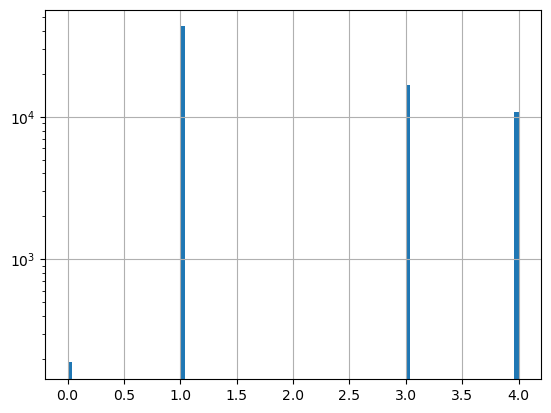

In [30]:
chm13_old['SCORE'].hist(bins=100, log=True)

<AxesSubplot:>

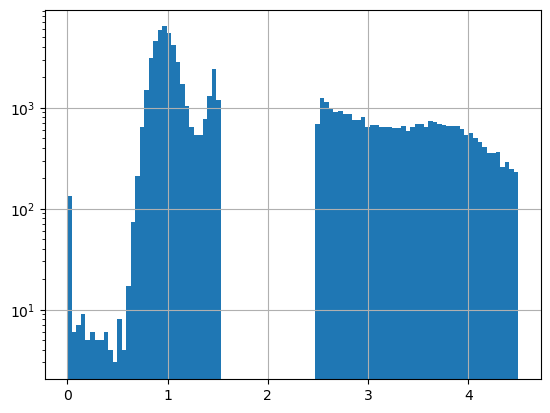

In [31]:
chm13_new['ID'].hist(bins=100, log=True)

<AxesSubplot:>

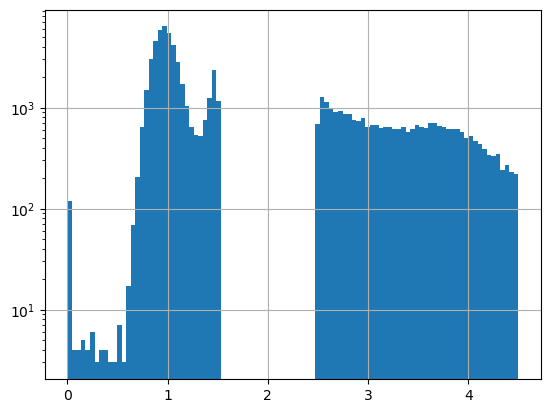

In [32]:
chm13_new_lifted['ID'].hist(bins=100, log=True)

<AxesSubplot:>

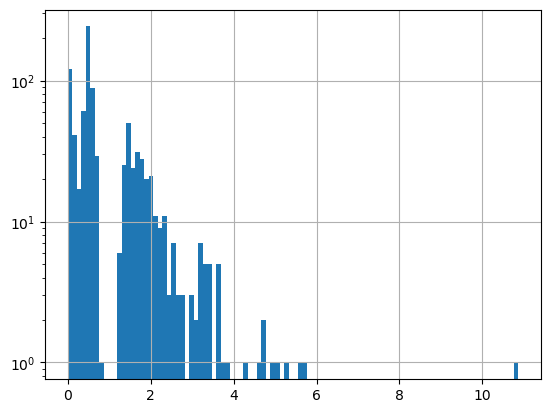

In [33]:
hg19 = pd.read_csv('../data/cnvator_data_sudmant_overlapped.csv')
hg19 = hg19.loc[hg19['Sample_ID'] == 'LP6005443-DNA_B08'] 
hg19['RD'].hist(bins=100, log=True)

<AxesSubplot:xlabel='Chr', ylabel='RD'>

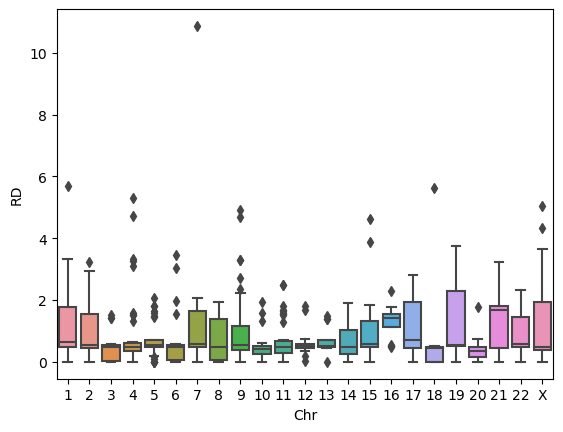

In [34]:
sns.boxplot(data=hg19, x="Chr", y="RD")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

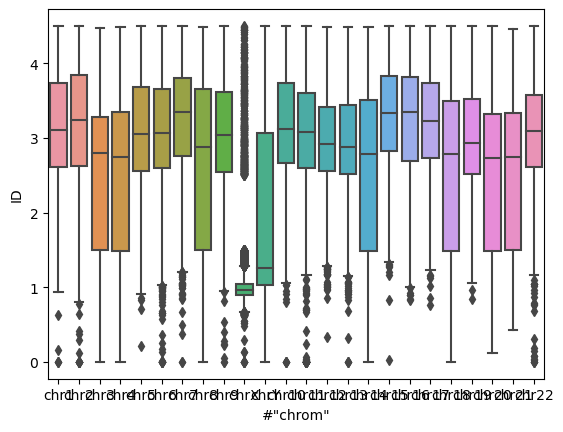

In [35]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

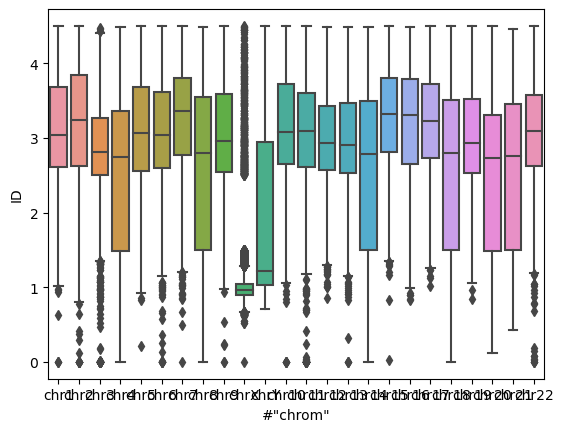

In [36]:
sns.boxplot(data=chm13_new_lifted, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

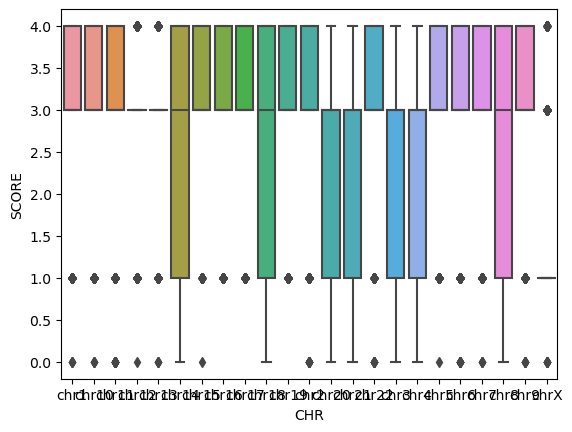

In [37]:
sns.boxplot(data=chm13_old, x='CHR', y="SCORE")

In [40]:
chm13_gene = pd.read_csv('/home/jbazanwilliamson/analysis/chm13_gene_regions.csv', index_col=0)
chm13_gene = chm13_gene.loc[chm13_gene['SAMPLE'] == 'LP6005443-DNA_B08'] 
chm13_gene

#chm13_gene['CHR'] = chm13_gene['CHR'].str.replace('chr', '')
chm13_gene = chm13_gene.sort_values(by='CHR')

/opt/spack/opt/spack/linux-rhel8-icelake/gcc-8.4.1/anaconda3-2021.05-fmo625scqdt32etnaksoexe3rd6sea7j/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

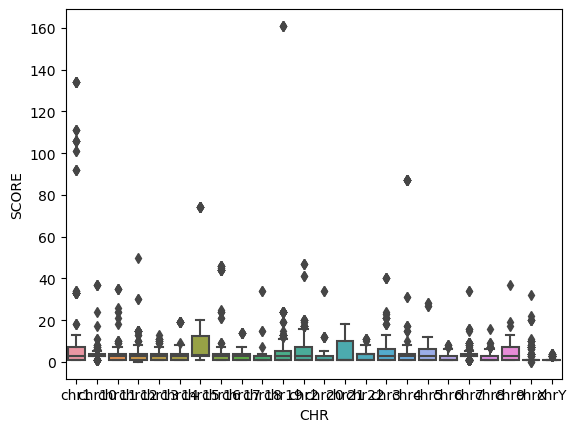

In [41]:
sns.boxplot(data=chm13_gene, x='CHR', y="SCORE")


<h1> Exclusion regions for T2T

In [56]:
exclusion = pd.read_table('/home/jbazanwilliamson/T2T.excluderanges.bed', header=None)
exclusion.columns = ['chr', 'start', 'end', 'type', 'extra1', 'extra2']
exclusion = exclusion.drop(columns=['extra1', 'extra2'])
exclusion

,chr,start,end,type
0,chr1,0,257700,High Signal Region
1,chr1,1125300,1182900,Low Mappability
2,chr1,2096500,2103700,High Signal Region
3,chr1,12446500,12497900,High Signal Region
4,chr1,12595200,12778100,High Signal Region
...,...,...,...,...
3560,chrX,153536900,153542900,High Signal Region
3561,chrX,153574000,153624600,Low Mappability
3562,chrX,153660200,153671700,High Signal Region
3563,chrX,153692000,153780500,Low Mappability


In [51]:
for cnv in np.array(chm13_new):
    for region in np.array(exclusion):
        if cnv[0] == region[0]: #shared chromosome
           # if cnv[1]==region[1] or cnv[2]==region[2]: #shared same position at the start or end 
           #     print(cnv, region)
                
            if cnv[1] <= region[1] <= cnv[2] or cnv[1] <= region[2] <= cnv[2]: #if the cnv is on at least 1bp of the exclusion region
                print(cnv,region)

['chr1' 16725273 16729044 3 0 '+' 0 0 '0,0,205' 3.0903806170214314 3771] ['chr1' 16704900 16728600 'Low Mappability' 0 '.']
['chr1' 108416691 108435067 3 0 '+' 0 0 '0,0,205' 2.9223288532819547 18376] ['chr1' 108417100 108528200 'High Signal Region' 0 '.']
['chr1' 121582768 121590318 4 0 '+' 0 0 '65,105,225' 3.5109299449712803
 7550] ['chr1' 121583600 126691700 'High Signal Region' 0 '.']
['chr1' 147378786 147386057 3 0 '+' 0 0 '0,0,205' 2.510130288659376 7271] ['chr1' 147379200 147385000 'High Signal Region' 0 '.']
['chr1' 148001861 148010854 4 0 '+' 0 0 '65,105,225' 3.881657444751452
 8993] ['chr1' 148003700 148040400 'High Signal Region' 0 '.']
['chr1' 148035519 148040627 4 0 '+' 0 0 '65,105,225' 3.692366897086624
 5108] ['chr1' 148003700 148040400 'High Signal Region' 0 '.']
['chr1' 154734696 154741300 3 0 '+' 0 0 '0,0,205' 2.899502428998492 6604] ['chr1' 154738100 154774400 'Low Mappability' 0 '.']
['chr1' 154880746 154885238 3 0 '+' 0 0 '0,0,205' 3.243946674582113 4492] ['chr1' 15

['chr3' 197352579 197357306 1 0 '+' 0 0 '196,196,196' 1.4596071341736847
 4727] ['chr3' 197354200 197380100 'High Signal Region' 0 '.']
['chr3' 198321037 198323650 3 0 '+' 0 0 '0,0,205' 3.0937193094574424 2613] ['chr3' 198322800 198463700 'High Signal Region' 0 '.']
['chr3' 200835856 200837109 3 0 '+' 0 0 '0,0,205' 2.73678184882039 1253] ['chr3' 200814300 200835900 'High Signal Region' 0 '.']
['chr4' 5728570 5741290 1 0 '+' 0 0 '196,196,196' 1.4722299467468796 12720] ['chr4' 5733600 5751800 'High Signal Region' 0 '.']
['chr4' 5746720 5754353 1 0 '+' 0 0 '196,196,196' 1.3985860146590925 7633] ['chr4' 5733600 5751800 'High Signal Region' 0 '.']
['chr4' 8599633 8601065 4 0 '+' 0 0 '65,105,225' 3.979458085707396 1432] ['chr4' 8600200 8620500 'High Signal Region' 0 '.']
['chr4' 56287298 56303165 1 0 '+' 0 0 '196,196,196' 1.488166763145606
 15867] ['chr4' 56303100 56309500 'High Signal Region' 0 '.']
['chr4' 74669450 74681146 1 0 '+' 0 0 '196,196,196' 1.4580539446846377
 11696] ['chr4' 74672

['chr8' 130855251 130869935 3 0 '+' 0 0 '0,0,205' 3.1168038676653693 14684] ['chr8' 130860200 130864700 'High Signal Region' 0 '.']
['chr8' 146245307 146259331 3 0 '+' 0 0 '0,0,205' 2.50387232720148 14024] ['chr8' 146256800 146259300 'Low Mappability' 0 '.']
['chr9' 5307390 5308935 4 0 '+' 0 0 '65,105,225' 3.6493985988895217 1545] ['chr9' 5307900 5309900 'Low Mappability' 0 '.']
['chr9' 5342552 5344098 4 0 '+' 0 0 '65,105,225' 3.616336092774846 1546] ['chr9' 5343100 5345000 'Low Mappability' 0 '.']
['chr9' 12334247 12350352 1 0 '+' 0 0 '196,196,196' 1.4964728181581972
 16105] ['chr9' 12344400 12348900 'High Signal Region' 0 '.']
['chr9' 17921284 17924304 0 0 '+' 0 0 '229,229,229' 0.245409669290757 3020] ['chr9' 17922700 17959100 'High Signal Region' 0 '.']
['chr9' 21384986 21391863 3 0 '+' 0 0 '0,0,205' 2.62250789168958 6877] ['chr9' 21387700 21388900 'High Signal Region' 0 '.']
['chr9' 38846899 38855127 4 0 '+' 0 0 '65,105,225' 3.613310146318571 8228] ['chr9' 38848500 39079100 'High S

['chrX' 30673848 30681812 1 0 '+' 0 0 '196,196,196' 0.925922779261256 7964] ['chrX' 30675600 30680800 'High Signal Region' 0 '.']
['chrX' 31108111 31112401 1 0 '+' 0 0 '196,196,196' 1.0052619281182265
 4290] ['chrX' 31109500 31133900 'High Signal Region' 0 '.']
['chrX' 31128050 31134644 1 0 '+' 0 0 '196,196,196' 0.8788909055577175
 6594] ['chrX' 31109500 31133900 'High Signal Region' 0 '.']
['chrX' 31284506 31295949 1 0 '+' 0 0 '196,196,196' 1.162306674562306
 11443] ['chrX' 31286700 31288800 'High Signal Region' 0 '.']
['chrX' 31840554 31845548 1 0 '+' 0 0 '196,196,196' 0.9793100247855256
 4994] ['chrX' 31842300 31845000 'High Signal Region' 0 '.']
['chrX' 33277883 33288616 1 0 '+' 0 0 '196,196,196' 0.7314621960427058
 10733] ['chrX' 33281300 33282600 'High Signal Region' 0 '.']
['chrX' 33845693 33852928 1 0 '+' 0 0 '196,196,196' 0.9232256369926782
 7235] ['chrX' 33846600 33852700 'High Signal Region' 0 '.']
['chrX' 34807501 34819127 1 0 '+' 0 0 '196,196,196' 1.0012589069114173
 11626

['chrX' 104226823 104235153 1 0 '+' 0 0 '196,196,196' 0.8912280659557997
 8330] ['chrX' 104228700 104234700 'High Signal Region' 0 '.']
['chrX' 104509190 104523696 1 0 '+' 0 0 '196,196,196' 1.009339793307519
 14506] ['chrX' 104511500 104513600 'High Signal Region' 0 '.']
['chrX' 104619535 104630820 1 0 '+' 0 0 '196,196,196' 0.9853544898926314
 11285] ['chrX' 104621900 104626200 'High Signal Region' 0 '.']
['chrX' 104886289 104899390 1 0 '+' 0 0 '196,196,196' 0.8259472768710235
 13101] ['chrX' 104886600 104911200 'High Signal Region' 0 '.']
['chrX' 104903847 104911651 1 0 '+' 0 0 '196,196,196' 0.9578399885173202
 7804] ['chrX' 104886600 104911200 'High Signal Region' 0 '.']
['chrX' 105002487 105020793 3 0 '+' 0 0 '0,0,205' 2.835494624284977 18306] ['chrX' 105011200 105014600 'High Signal Region' 0 '.']
['chrX' 105591411 105605175 1 0 '+' 0 0 '196,196,196' 0.8752369204658182
 13764] ['chrX' 105592200 105598300 'High Signal Region' 0 '.']
['chrX' 105797813 105806933 1 0 '+' 0 0 '196,196,1

['chrX' 127705830 127711653 1 0 '+' 0 0 '196,196,196' 1.004095479699348
 5823] ['chrX' 127706900 127726900 'High Signal Region' 0 '.']
['chrX' 127881121 127884017 1 0 '+' 0 0 '196,196,196' 1.040534029500272
 2896] ['chrX' 127882400 127883600 'High Signal Region' 0 '.']
['chrX' 128766628 128773837 1 0 '+' 0 0 '196,196,196' 1.039334120586389
 7209] ['chrX' 128767400 128773300 'High Signal Region' 0 '.']
['chrX' 128836301 128843777 1 0 '+' 0 0 '196,196,196' 0.9191150187184236
 7476] ['chrX' 128837200 128843200 'Low Mappability' 0 '.']
['chrX' 128886507 128895868 1 0 '+' 0 0 '196,196,196' 0.9835184071276372
 9361] ['chrX' 128887600 128893500 'High Signal Region' 0 '.']
['chrX' 129276608 129285832 1 0 '+' 0 0 '196,196,196' 0.9246820527879276
 9224] ['chrX' 129278500 129284700 'High Signal Region' 0 '.']
['chrX' 129418939 129470510 1 0 '+' 0 0 '196,196,196' 0.8106961530263744
 51571] ['chrX' 129443500 129448800 'High Signal Region' 0 '.']
['chrX' 129475335 129494563 1 0 '+' 0 0 '196,196,196'

['chrX' 152416848 152417953 1 0 '+' 0 0 '196,196,196' 1.0205622169608208
 1105] ['chrX' 152417900 152529800 'High Signal Region' 0 '.']
['chrX' 152525160 152532505 1 0 '+' 0 0 '196,196,196' 1.0104571474694564
 7345] ['chrX' 152417900 152529800 'High Signal Region' 0 '.']
['chrX' 152583983 152585357 1 0 '+' 0 0 '196,196,196' 0.9892228909683758
 1374] ['chrX' 152574400 152584000 'Low Mappability' 0 '.']
['chrX' 152613581 152614974 1 0 '+' 0 0 '196,196,196' 1.2391317588696662
 1393] ['chrX' 152614700 152636400 'Low Mappability' 0 '.']
['chrX' 152789358 152792531 1 0 '+' 0 0 '196,196,196' 1.1064257378976468
 3173] ['chrX' 152792000 152828000 'Low Mappability' 0 '.']
['chrX' 152847658 152853967 1 0 '+' 0 0 '196,196,196' 1.389387349655028
 6309] ['chrX' 152849400 152903000 'Low Mappability' 0 '.']
['chrX' 152896037 152911104 1 0 '+' 0 0 '196,196,196' 0.9929769745812717
 15067] ['chrX' 152849400 152903000 'Low Mappability' 0 '.']
['chrX' 153097878 153112294 1 0 '+' 0 0 '196,196,196' 0.7638703

['chr13' 28416837 28428754 3 0 '+' 0 0 '0,0,205' 2.526646756846827 11917] ['chr13' 28417100 28418900 'High Signal Region' 0 '.']
['chr13' 40744012 40761651 1 0 '+' 0 0 '196,196,196' 1.423334684250711
 17639] ['chr13' 40753100 40759500 'High Signal Region' 0 '.']
['chr13' 105433765 105440953 3 0 '+' 0 0 '0,0,205' 2.691317171324738 7188] ['chr13' 105434300 105439900 'High Signal Region' 0 '.']
['chr14' 15107827 15116165 4 0 '+' 0 0 '65,105,225' 4.117903112130222 8338] ['chr14' 15108600 15114100 'High Signal Region' 0 '.']
['chr14' 15141535 15145865 4 0 '+' 0 0 '65,105,225' 4.259456639761269 4330] ['chr14' 15143200 15145200 'High Signal Region' 0 '.']
['chr14' 18151538 18153462 4 0 '+' 0 0 '65,105,225' 4.001143952779531 1924] ['chr14' 18152700 18229000 'High Signal Region' 0 '.']
['chr14' 18210342 18230305 4 0 '+' 0 0 '65,105,225' 3.860951128365 19963] ['chr14' 18152700 18229000 'High Signal Region' 0 '.']
['chr14' 26431614 26442123 3 0 '+' 0 0 '0,0,205' 2.580029474946826 10509] ['chr14' 

['chr19' 53077127 53091007 4 0 '+' 0 0 '65,105,225' 4.273332204778512
 13880] ['chr19' 53091000 53227400 'High Signal Region' 0 '.']
['chr20' 3526053 3548852 3 0 '+' 0 0 '0,0,205' 3.112878166376192 22799] ['chr20' 3527000 3545000 'High Signal Region' 0 '.']
['chr20' 49638696 49641414 4 0 '+' 0 0 '65,105,225' 4.038811698270092 2718] ['chr20' 49641100 49671300 'High Signal Region' 0 '.']
['chr20' 56584258 56587530 3 0 '+' 0 0 '0,0,205' 3.394802997975463 3272] ['chr20' 56585300 56587400 'High Signal Region' 0 '.']
['chr20' 65913871 65919384 1 0 '+' 0 0 '196,196,196' 1.423603287843802
 5513] ['chr20' 65908500 65919200 'High Signal Region' 0 '.']
['chr22' 21516122 21522137 3 0 '+' 0 0 '0,0,205' 3.2175156424277094 6015] ['chr22' 21520300 21975300 'High Signal Region' 0 '.']
['chr22' 21973301 21977904 4 0 '+' 0 0 '65,105,225' 3.7338158907357086
 4603] ['chr22' 21520300 21975300 'High Signal Region' 0 '.']
['chr22' 43038795 43041537 4 0 '+' 0 0 '65,105,225' 3.966435586460257 2742] ['chr22' 430

In [63]:
cnv_excluded = []
for cnv in np.array(chm13_new):
    for region in np.array(exclusion):
        if cnv[0] == region[0]: #shared chromosome
           # if cnv[1]==region[1] or cnv[2]==region[2]: #shared same position at the start or end 
           #     print(cnv, region)
                
            if region[1] <= cnv[1] <= region[2] or region[1] <= cnv[2] <= region[2]:#if the cnv is on at least 1bp of the exclusion region 
                cnv_excluded.append(cnv)

In [68]:
cnv_excluded = pd.DataFrame(cnv_excluded)
cnv_excluded.columns = chm13_new.columns
cnv_excluded = cnv_excluded.drop_duplicates()
cnv_excluded


cnv_no_excluded = pd.concat([cnv_excluded, chm13_new])
cnv_no_excluded = cnv_no_excluded.drop_duplicates(keep=False)
cnv_no_excluded

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
89,chr1,260453,261566,3,0,+,0,0,"0,0,205",2.887880,1113
90,chr1,261566,263205,3,0,+,0,0,"0,0,205",3.398709,1639
91,chr1,263205,264505,3,0,+,0,0,"0,0,205",3.326478,1300
92,chr1,264505,269912,4,0,+,0,0,"65,105,225",3.790298,5407
93,chr1,269912,271404,4,0,+,0,0,"65,105,225",4.143640,1492
...,...,...,...,...,...,...,...,...,...,...,...
1179212,chr22,51283116,51286137,4,0,+,0,0,"65,105,225",3.781137,3021
1179213,chr22,51286137,51288688,4,0,+,0,0,"65,105,225",3.891665,2551
1179215,chr22,51289688,51291273,4,0,+,0,0,"65,105,225",4.201965,1585
1179216,chr22,51291273,51292827,4,0,+,0,0,"65,105,225",3.945943,1554


<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

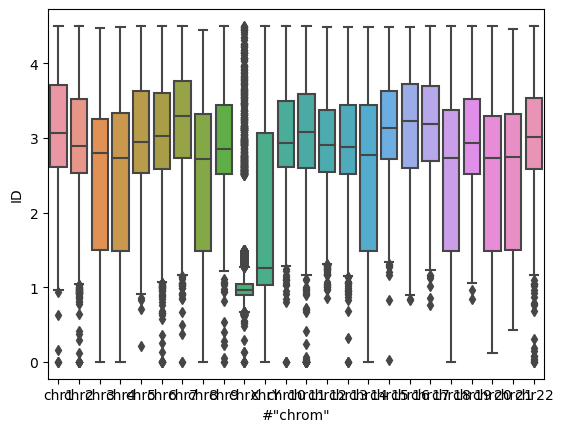

In [70]:
sns.boxplot(data=cnv_no_excluded, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

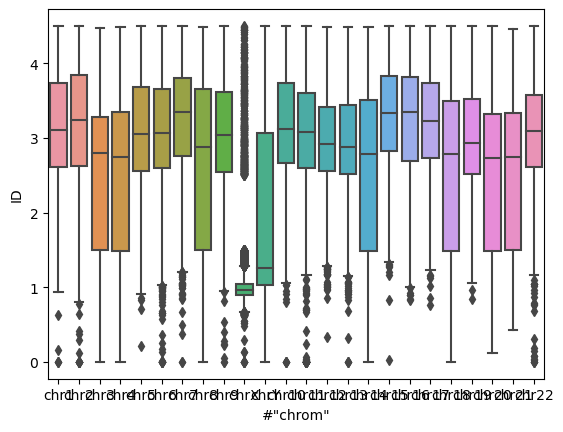

In [71]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")